# Group information

|MSSV|Họ và tên|
|---|---|
|19120186|Đỗ Lê Khánh Đăng|
|19120301|Võ Thành Nam|
|19120412|Nguyễn Minh Tú|
|19120462|Lục Minh Bửu|
|19120217|Trần Mỹ Hân|

# Preprocess and Visualize data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_squared_log_error
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import set_config
from sklearn.model_selection import train_test_split

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, LassoLars, SGDRegressor, Ridge, LogisticRegression, BayesianRidge
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

set_config(display='diagram') 

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# cd /content/drive/MyDrive/IDA_Project

/content/drive/MyDrive/IDA_Project


In [ ]:
data_df = pd.read_csv('data/train.csv')
data_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


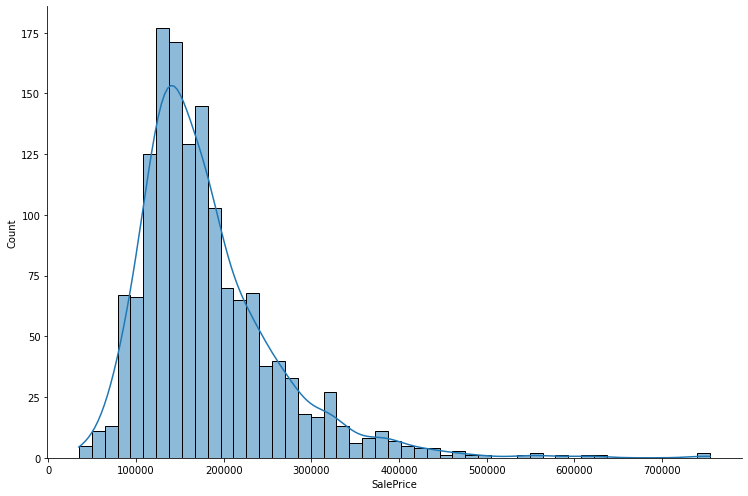

In [ ]:
sns.displot(x=data_df['SalePrice'],kde=True,height=7,aspect=1.5);

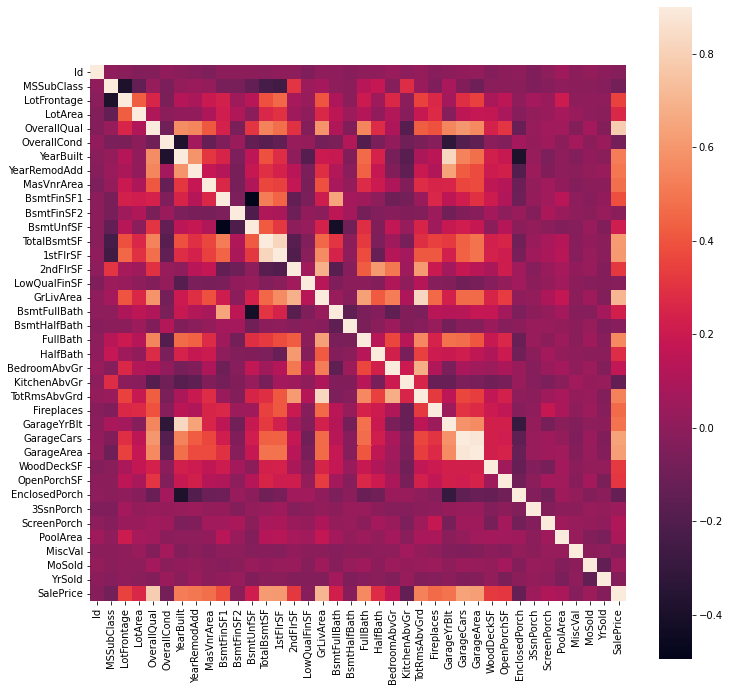

In [ ]:
corrmat = data_df.corr()
plt.subplots(figsize=(12,12))
sns.heatmap(corrmat, vmax=0.9, square=True);

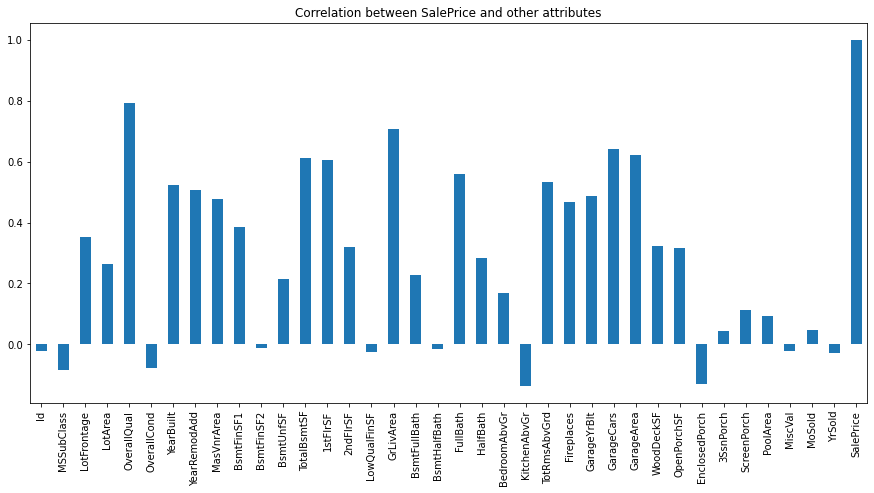

In [ ]:
corrmat['SalePrice'].plot(kind='bar',figsize=(15,7),title='Correlation between SalePrice and other attributes');

## Columns 1 - 16

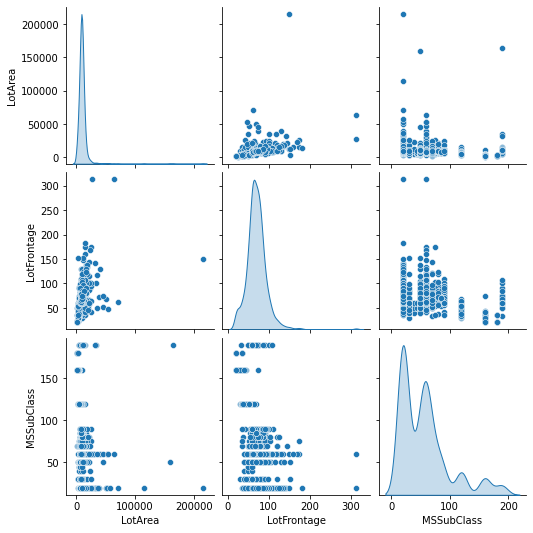

In [ ]:
sns.pairplot(data_df[['LotArea','LotFrontage','MSSubClass']],diag_kind="kde");

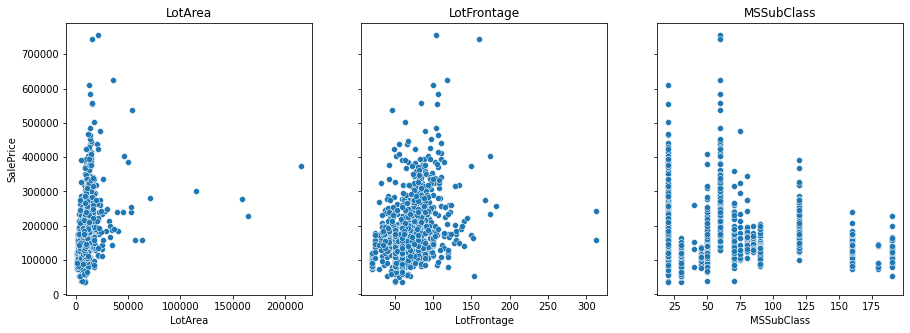

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
sns.scatterplot(ax=axes[0], x=data_df['LotArea'], y=data_df['SalePrice'])
axes[0].set_title('LotArea')
sns.scatterplot(ax=axes[1], x=data_df['LotFrontage'], y=data_df['SalePrice'])
axes[1].set_title('LotFrontage')
sns.scatterplot(ax=axes[2], x=data_df['MSSubClass'], y=data_df['SalePrice'])
axes[2].set_title('MSSubClass');

Ta thấy cả 3 yếu tố trên đều k có ảnh hưởng đến giá bán

In [ ]:
modeImputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
meanImputer = SimpleImputer(missing_values=np.nan, strategy='mean')
noneImputer = SimpleImputer(fill_value='None',strategy='constant')

Với cột `LotFrontage` thì ta sẽ điền giá trị mean cho các vị trí `nan`.

In [ ]:
meanImputer.fit(data_df.loc[:,'LotFrontage'].values.reshape(-1, 1))
data_df.loc[:,'LotFrontage']=meanImputer.transform(data_df.loc[:,'LotFrontage'].values.reshape(-1, 1))

Với cột `Alley`, theo mô tả từ file description thì giá trị `nan` nghĩa là không có cổng vào, do đó ta sẽ điền `None`.

In [ ]:
noneImputer.fit(data_df.loc[:,'Alley'].values.reshape(-1, 1))
data_df.loc[:,'Alley']=noneImputer.transform(data_df.loc[:,'Alley'].values.reshape(-1, 1))

## Columns 17 - 32


In [ ]:
name_2 = data_df.columns[17:33].to_list()

In [ ]:
data_df[name_2].isnull().sum()

OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       8
MasVnrArea       8
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual        37
BsmtCond        37
BsmtExposure    38
dtype: int64

In [ ]:
data_df["MasVnrType"].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [ ]:
data_df[data_df['MasVnrArea'].isnull()].index

Int64Index([234, 529, 650, 936, 973, 977, 1243, 1278], dtype='int64')

In [ ]:
data_df[data_df['MasVnrType'].isnull()].index

Int64Index([234, 529, 650, 936, 973, 977, 1243, 1278], dtype='int64')

Nếu điền theo mode thì MasVnrType ta sẽ điền là None.

Như ta thấy thì cột BsmtQual bị thiếu 37 giá trị. Ta check file description thì thấy là những cột này là chiều cao của tầng hầm. Những cột thiếu nghĩa là không có tầng hầm. <br />
Cột MasVnrArea và MasVnrType thiếu 8 giá trị. 2 cột này có mối liên hệ với nhau là cột MasVnrType nói về loại ván xây được xử dụng và MasVnrArea nói về diện tích ván xây. Nếu không loại ván xây bị có giá trị NA và diện tích ván xây cũng không có.<br />
Ta sẽ tiến hành điền những dòng thiếu bằng None và riêng cột MasVnrArea ta sẽ điền cột thiếu bằng 0.

In [ ]:
data_df['BsmtQual'].fillna("None",inplace=True)
data_df['MasVnrType'].fillna('None',inplace=True)
data_df['MasVnrArea'].fillna(0,inplace=True)

#### Visualize


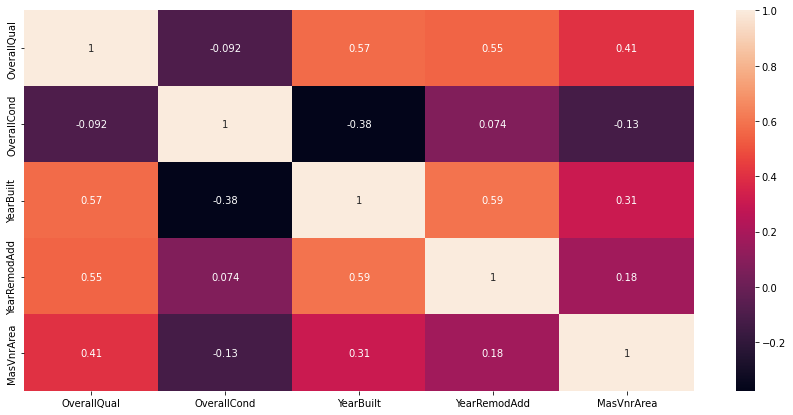

In [ ]:
data_corr = data_df[name_2].corr()
plt.figure(figsize=(15,7))
sns.heatmap(data_corr,annot=True);

Mối tương quan giữa năm xây và loại mái của nhà

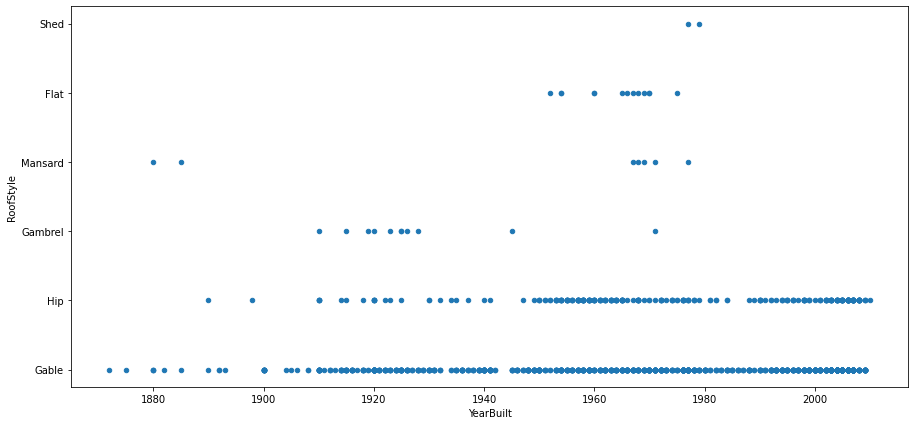

In [ ]:
data_df.plot.scatter(x='YearBuilt',y='RoofStyle',figsize=(15,7));

## Columns 33 - 48

In [ ]:
col33_48 = data_df.columns[33:49]

Đếm giá trị NaN của từng cột

In [ ]:
data_df[col33_48].isnull().sum()

BsmtFinType1    37
BsmtFinSF1       0
BsmtFinType2    38
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       1
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
dtype: int64

Ta thấy có 3 cột có giá trị thiếu (NaN) là 'BsmtFinType1', 'BsmtFinType2', 'Electrical'.
- Theo như miêu tả trong file 'data_description.txt' thì cột 'BsmtFinType1' và 'BsmtFinType2' mang giá trị NaN khi không có tầng hầm, ta sẽ fill các giá trị NaN này thành 'None'.
- Còn về phần cột 'Electrical' thì miêu tả trong file 'data_description.txt' không ghi rõ mang giá trị NaN khi nào, mà cũng chỉ có 1 dòng có giá trị Nan tại cột này nên ta sẽ bỏ luôn dòng này.

Fill giá trị NaN tại cột 'BsmtFinType1' và 'BsmtFinType2' thành 'None'

In [ ]:
data_df['BsmtFinType1'].fillna('None',inplace=True)
data_df['BsmtFinType2'].fillna('None',inplace=True)

Drop dòng có giá trị NaN tại cột 'Electrical'

In [ ]:
data_df = data_df[data_df['Electrical'].isnull() != True]

Đếm lại giá trị NaN của từng cột sau khi fill và drop

In [ ]:
data_df[col33_48].isnull().sum()

BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
Heating         0
HeatingQC       0
CentralAir      0
Electrical      0
1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
GrLivArea       0
BsmtFullBath    0
BsmtHalfBath    0
dtype: int64

Như vậy, tập train không còn giá trị thiếu ở các cột này.

### Visualize

Mối quan hệ giữa diện tích mặt đất và giá

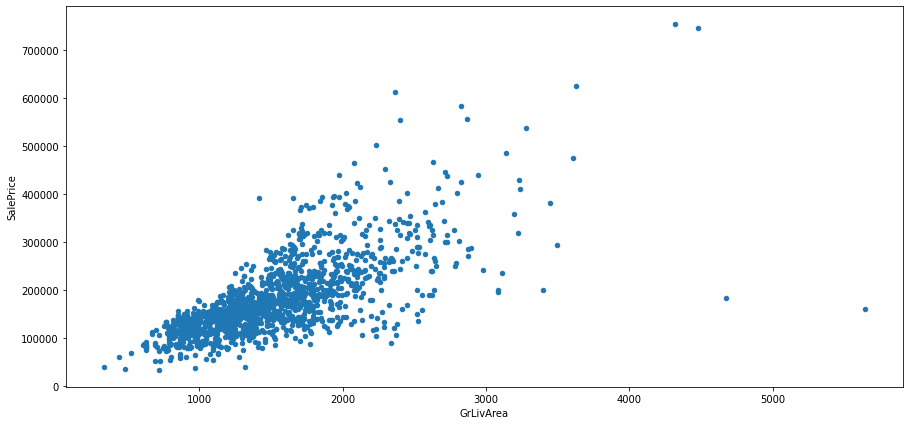

In [ ]:
data_df[['GrLivArea','SalePrice']].plot(kind='scatter',x='GrLivArea',y='SalePrice',figsize=(15,7));

Mối quan hệ giữa diện tích tầng 1 và diện tích tầng 2.

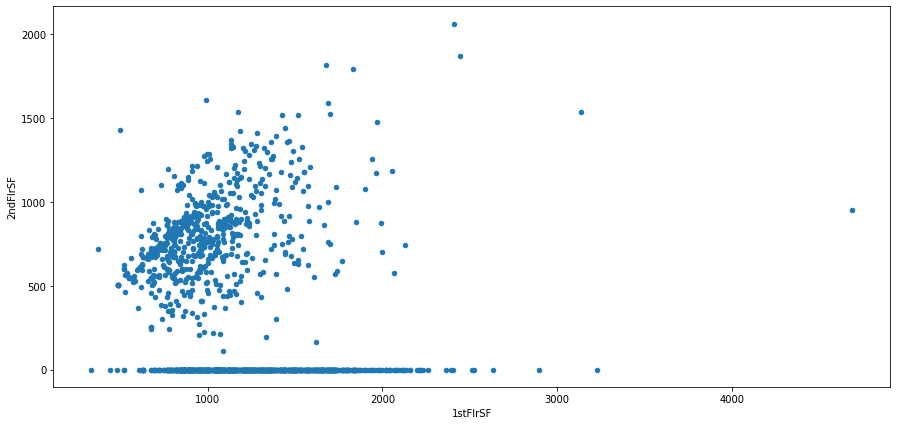

In [ ]:
data_df.plot.scatter(x='1stFlrSF',y='2ndFlrSF',figsize=(15,7));

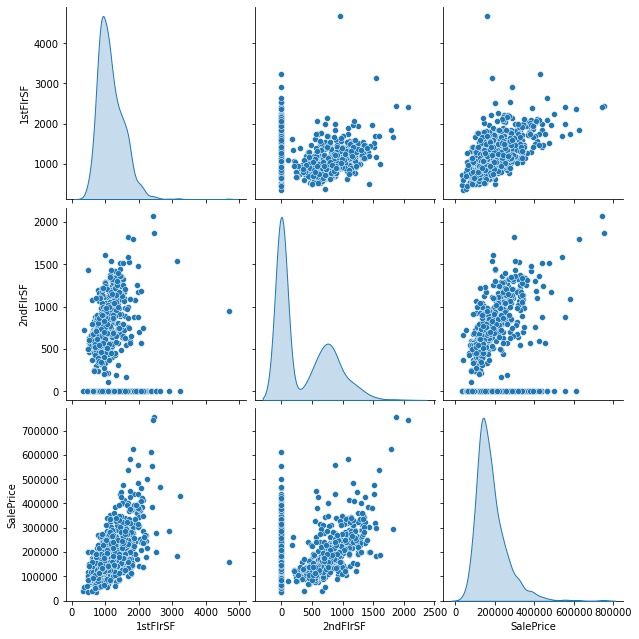

In [ ]:
sns.pairplot(data_df[['1stFlrSF','2ndFlrSF','SalePrice']],diag_kind="kde",height=3);

## Columns 49 - 64

In [ ]:
buu_columns = data_df.columns[49:65]

In [ ]:
data_df[buu_columns].isna().sum()

FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
KitchenQual       0
TotRmsAbvGrd      0
Functional        0
Fireplaces        0
FireplaceQu     689
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageCars        0
GarageArea        0
GarageQual       81
GarageCond       81
dtype: int64

Ta thấy các cột có chứa giá trị `nan` là FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond. Ta sẽ điền `None` vào các cột `FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond` và điền mean vào cột `GarageYrBlt`

In [ ]:
noneImputer.fit(data_df.loc[:,['FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond']].values)
data_df.loc[:,['FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond']]=\
            noneImputer.transform(data_df.loc[:,['FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond']].values)

meanImputer.fit(data_df.loc[:,'GarageYrBlt'].values.reshape(-1, 1))
data_df.loc[:,'GarageYrBlt']=meanImputer.transform(data_df.loc[:,'GarageYrBlt'].values.reshape(-1, 1))

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


### Visualize

Tương quan giữa chất lượng kitchen và chất lượng garage:


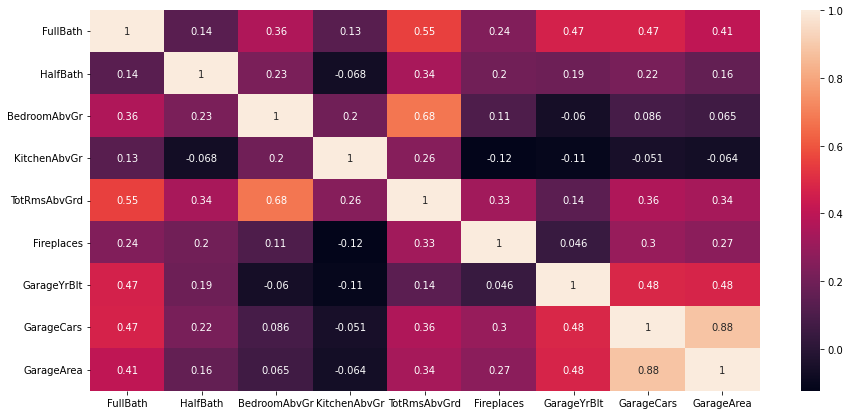

In [ ]:
buu_corr = data_df[buu_columns].corr()
plt.figure(figsize=(15,7))
sns.heatmap(buu_corr,annot=True);

Tương quan giữa số lượng xe trong Garage và kích thước Garage:

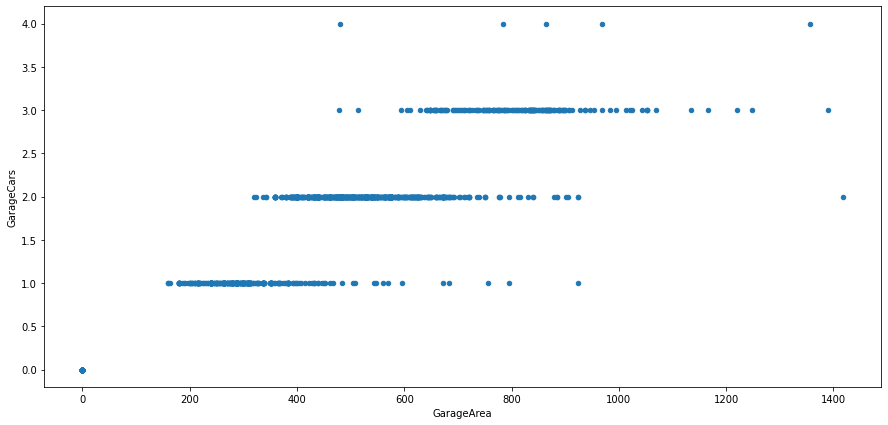

In [ ]:
data_df[buu_columns].plot.scatter(x='GarageArea',y='GarageCars',figsize=(15,7));

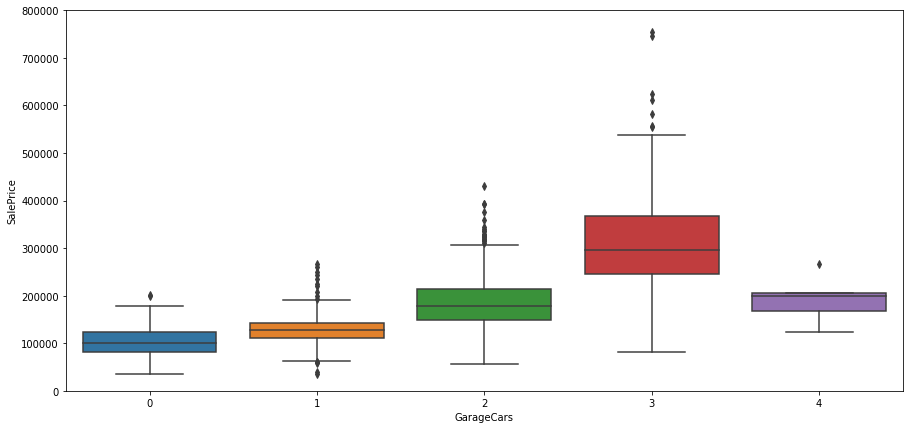

In [ ]:
var = 'GarageCars'
data = pd.concat([data_df['SalePrice'], data_df[var]], axis=1)
f, ax = plt.subplots(figsize=(15, 7))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

## Columns 65 - 80

In [ ]:
cols=data_df.columns[65:81].tolist()

In [ ]:
data_df[cols].isnull().sum()

PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
PoolQC           1452
Fence            1178
MiscFeature      1405
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
dtype: int64

Có 3 cột thiếu, đó là:

PoolQC(chất lượng hồ bơi) thiếu 1452 giá trị.

Fence(chất lượng hàng rào) thiếu 1178 giá trị.

MiscFeature(vật dụng linh tinh) thiếu 1405 giá trị.

Ta sẽ tiến hành điền những giá trị thiếu bằng None.

In [ ]:
data_df.loc[:,'PoolQC'].fillna("None",inplace=True)
data_df.loc[:,'Fence'].fillna("None",inplace=True)
data_df.loc[:,'MiscFeature'].fillna("None",inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
data_df[cols].isnull().sum()

PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
PoolQC           0
Fence            0
MiscFeature      0
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
dtype: int64

Các cột không còn giá trị thiếu nữa.

### Visualize

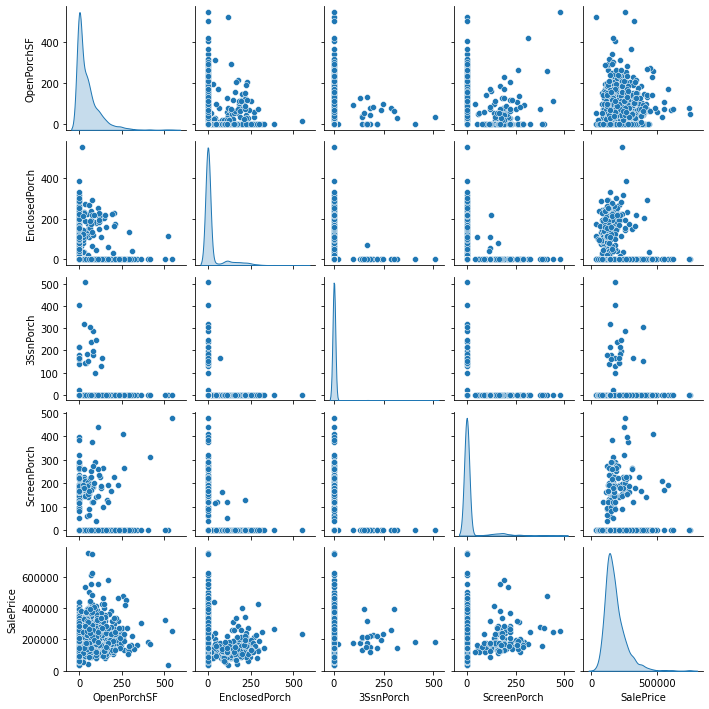

In [ ]:
sns.pairplot(data_df[['OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','SalePrice']],diag_kind="kde",height=2);

**Mối tương quan giữa điều kiện của garage và năm bán.**

In [ ]:
datadf=data_df.loc[:,["GarageCond","YrSold"]]
datadf

,GarageCond,YrSold
0,TA,2008
1,TA,2007
2,TA,2008
3,TA,2006
4,TA,2008
...,...,...
1455,TA,2007
1456,TA,2010
1457,TA,2010
1458,TA,2010


In [ ]:
datadf["GarageCond"].value_counts()

TA      1325
None      81
Fa        35
Gd         9
Po         7
Ex         2
Name: GarageCond, dtype: int64

Như ta thấy thì garage có điều kiện TA(điển hình) được bán nhiều nhất: 1326, vượt xa các loại còn lại.

In [ ]:
datadf=datadf[datadf["GarageCond"]=='TA']
datadf

,GarageCond,YrSold
0,TA,2008
1,TA,2007
2,TA,2008
3,TA,2006
4,TA,2008
...,...,...
1455,TA,2007
1456,TA,2010
1457,TA,2010
1458,TA,2010


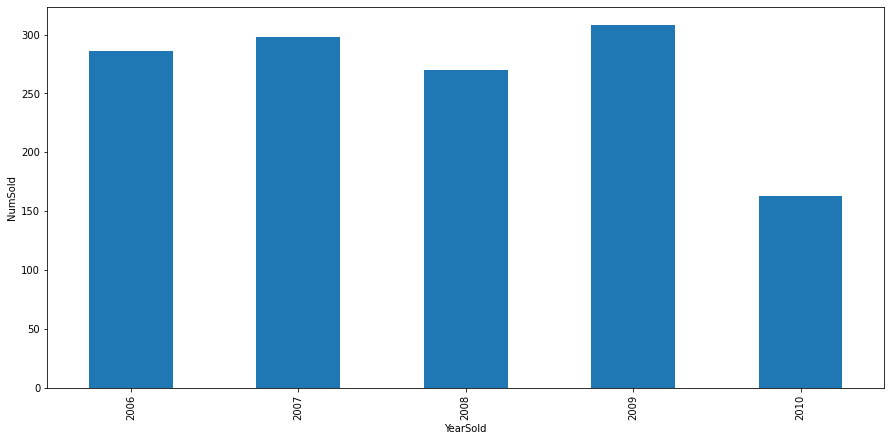

In [ ]:
dataVisua=datadf["YrSold"].value_counts()
dataVisua=dataVisua.sort_index()
dataVisua.plot.bar(xlabel="YearSold",ylabel="NumSold",figsize=(15,7));

Số lượng bán từ năm 2006 đến 2009 không chênh lệch nhiều nhưng sang năm 2010 thì giảm đáng kể. Rất có thể khoảng thời gian sau này người mua chú trọng về điều kiện của garage hơn thay vì mua loại phổ thông như trước.

# Pipeline

Read data

In [ ]:
data_df = pd.read_csv('data/train.csv')

Split training and validation data

In [ ]:
y_sr = data_df["SalePrice"]
X_df = data_df.drop("SalePrice", axis=1)

In [ ]:
train_X_df, val_X_df, train_y_sr, val_y_sr = train_test_split(X_df, y_sr, 
                                               test_size=0.2, 
                                               random_state=0)

Create pipeline

In [ ]:
def GroupingColumns(df):
    categorical_cols = []
    numerical_cols = []
    for col in df.columns:
        if df[col].dtype=='object':
            categorical_cols.append(col)
        else:
            numerical_cols.append(col)
    return categorical_cols, numerical_cols

In [ ]:
cate_cols_with_nan_defined = ['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
                              'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PoolQC',
                             'Fence','MiscFeature']
cate_cols_considered = ['MSSubClass']
remaining_cols=[col for col in train_X_df.columns if col not in cate_cols_with_nan_defined+cate_cols_considered]
remaining_cate_cols, numerical_cols = GroupingColumns(train_X_df[remaining_cols])
cate_cols = cate_cols_with_nan_defined + cate_cols_considered + remaining_cate_cols
numerical_cols.remove('Id')

In [ ]:
modeImputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
meanImputer = SimpleImputer(missing_values=np.nan, strategy='mean')
noneImputer = SimpleImputer(fill_value='None',strategy='constant')

In [ ]:
ordinal_mappings = {
    "MSSubClass": [ 20, 30,40,45,50,60,70,75,80,85, 90,120,150,160,180,190], 
    "ExterQual": ['Po','Fa','TA','Gd','Ex'], 
    "ExterCond": ['Po','Fa','TA','Gd','Ex'],
    "LotShape": ['Reg','IR1' ,'IR2','IR3'], 
    "BsmtQual": ['None','Fa','TA','Gd','Ex'], 
    "BsmtCond": ['None','Po','Fa','TA','Gd','Ex'], 
    "BsmtExposure": ['None','No','Mn','Av','Gd'], 
    "BsmtFinType1": ['None','Unf','LwQ', 'Rec','BLQ','ALQ' , 'GLQ' ], 
    "BsmtFinType2": ['None','Unf','LwQ', 'Rec','BLQ','ALQ' , 'GLQ' ], 
    "HeatingQC": ['Po','Fa','TA','Gd','Ex'], 
    "Functional": ['Sev','Maj2','Maj1','Mod','Min2','Min1','Typ'], 
    "FireplaceQu": ['None','Po','Fa','TA','Gd','Ex'], 
    "KitchenQual": ['Fa','TA','Gd','Ex'], 
    "GarageFinish": ['None','Unf','RFn','Fin'], 
    "GarageQual": ['None','Po','Fa','TA','Gd','Ex'], 
    "GarageCond": ['None','Po','Fa','TA','Gd','Ex'], 
    "PoolQC": ['None','Fa','Gd','Ex'], 
    "Fence": ['None','MnWw','GdWo','MnPrv','GdPrv'],
}
   
ordinal_encoding_cols1 = ['MSSubClass','ExterQual','ExterCond','LotShape','HeatingQC','Functional','KitchenQual']
ordinal_encoder1 = OrdinalEncoder(categories=[ordinal_mappings[i] for i in ordinal_encoding_cols1])

ordinal_encoding_cols2 = [col for col in [*ordinal_mappings] if col not in ordinal_encoding_cols1]
ordinal_encoder2 = OrdinalEncoder(categories=[ordinal_mappings[i] for i in ordinal_encoding_cols2])

oh_encoding_cols = [col for col in cate_cols if col not in [*ordinal_mappings]]
oh_encoder = OneHotEncoder(handle_unknown='ignore',sparse=False)
mode_oh = list(set(remaining_cate_cols) & set(oh_encoding_cols))
none_oh = list(set(cate_cols_with_nan_defined) & set(oh_encoding_cols))

In [ ]:
class columnDropperTransformer():
    def __init__(self,columns):
        self.columns=columns

    def transform(self,X,y=None):
        return X.drop(self.columns,axis=1)

    def fit(self, X, y=None):
        return self

In [ ]:
mode_oh_pl = Pipeline([('Mode',modeImputer),('OneHotEncode',oh_encoder)])
mode_or_pl = Pipeline([('Mode',modeImputer),('OrdinalEncode',ordinal_encoder1)])
none_oh_pl = Pipeline([('None',noneImputer),('OneHotEncode',oh_encoder)])
none_or_pl = Pipeline([('None',noneImputer),('OrdinalEncode',ordinal_encoder2)])

cols_transformer = ColumnTransformer([
    ('Mean',meanImputer,numerical_cols),
    ('Mode-OHEncode',mode_oh_pl,mode_oh),
    ('Mode-OdEncode',mode_or_pl,ordinal_encoding_cols1),
    ('None-OHEncode',none_oh_pl,none_oh),
    ('None-OdEncode',none_or_pl,ordinal_encoding_cols2),
])
preprocess = Pipeline([
    ("columnDropper", columnDropperTransformer(['Id'])),
    ('ColsTransformer',cols_transformer),
    ('StdScaler',StandardScaler())
])

preprocess

Pipeline(steps=[('columnDropper',
                 <__main__.columnDropperTransformer object at 0x7f86e4f23d90>),
                ('ColsTransformer',
                 ColumnTransformer(transformers=[('Mean', SimpleImputer(),
                                                  ['LotFrontage', 'LotArea',
                                                   'OverallQual', 'OverallCond',
                                                   'YearBuilt', 'YearRemodAdd',
                                                   'MasVnrArea', 'BsmtFinSF1',
                                                   'BsmtFinSF2', 'BsmtUnfSF',
                                                   'TotalBsmtSF', '1stFlrSF',
                                                   '2ndFlrSF', 'LowQualFinSF',
                                                   '...
                                                                                               'Gd',
                                                                                               'Ex'],
                                                                                              ['None',
                                                                                               'Unf',
                                                                                               'RFn',
                                                                                               'Fin'],
                                                                                              ['None',
                                                                                               'Po',
                                                                                               'Fa',
                                                                                               'TA',
                                                                                               'Gd',
                                                                                               'Ex'],
                                                                                              ['None',
                                                                                               'Po',
                                                                                               'Fa',
                                                                                               'TA',
                                                                                               'Gd',
                                                                                               'Ex'],
                                                                                              ['None',
                                                                                               'Fa',
                                                                                               'Gd',
                                                                                               'Ex'],
                                                                                              ['None',
                                                                                               'MnWw',
                                                                                               'GdWo',
                                                                                               'MnPrv',
                                                                                               'GdPrv']]))]),
                                                  ['BsmtQual', 'BsmtCond',
                                                   'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2',
                                                   'FireplaceQu',
                                                   'GarageFinish

# Run Machine Learning model

## Evaluation function

In [ ]:
def evaluate(y_true, y_pred):
    mae = mean_absolute_error(y_true,y_pred)
    mse = mean_squared_error(y_true,y_pred)
    rsquare = r2_score(y_true,y_pred)
    rmse = mean_squared_error(y_true,y_pred,squared = False)
    try:
        rmsle = mean_squared_log_error(y_true,y_pred,squared = False)
    except:
        rmsle = np.nan
    return mae, mse, rsquare, rmse, rmsle

 ## List of machine learning model

In [ ]:
model_list = {
    'decision_tree_regression':DecisionTreeRegressor(random_state = 42),
    'linear_regression':LinearRegression(),
    'lasso_lars':LassoLars(alpha=41,eps=1.38,random_state = 42,normalize=False),
    'ridge_regression':Ridge(alpha=1778,random_state=42),
    'SVR': SVR(),
    'random_forest_regression':RandomForestRegressor(n_estimators=400,random_state = 42),
    'logistic_regression':LogisticRegression(random_state = 42),
    'bayesian_ridge':BayesianRidge(),
    'gradient_boosting':GradientBoostingRegressor(random_state = 42),
}

## Train model and evaluate

In [ ]:
preprocessed_train_X = preprocess.fit_transform(train_X_df)
preprocessed_val_X = preprocess.transform(val_X_df)
score = dict()
for key in model_list.keys():
    model = model_list[key].fit(preprocessed_train_X,train_y_sr)
    val_y_pred = model.predict(preprocessed_val_X)
    score[key] = evaluate(val_y_sr,val_y_pred)
score_df = pd.DataFrame(score).T.round(5)
score_df.columns=['MAE','MSE','R2 Square','RMSE','RMSLE']
score_df

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_least_angle.py:688: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 114 iterations, alpha=5.278e+02, previous alpha=5.273e+02, with an active set of 107 regressors.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


,MAE,MSE,R2 Square,RMSE,RMSLE
decision_tree_regression,2.521148e+04,1.472737e+09,7.867400e-01,3.837626e+04,0.20211
linear_regression,2.528848e+15,4.479032e+32,-6.485851e+22,2.116372e+16,NaN
lasso_lars,2.178325e+04,2.615531e+09,6.212600e-01,5.114226e+04,0.22975
ridge_regression,2.158004e+04,1.962878e+09,7.157700e-01,4.430438e+04,0.16660
SVR,5.553249e+04,7.239552e+09,-4.832000e-02,8.508556e+04,0.38978
random_forest_regression,1.725631e+04,1.125030e+09,8.370900e-01,3.354146e+04,0.14077
logistic_regression,3.650919e+04,4.425206e+09,3.592100e-01,6.652222e+04,0.27702
bayesian_ridge,2.262940e+04,2.647103e+09,6.166900e-01,5.145001e+04,0.23479
gradient_boosting,1.653198e+04,8.441450e+08,8.777600e-01,2.905417e+04,0.12831


## Predict on test data

In [ ]:
test_X_df = pd.read_csv('data/test.csv')
preprocessed_X_df = preprocess.fit_transform(X_df)
preprocessed_test_X_df = preprocess.transform(test_X_df)
for key in model_list.keys():
    model = model_list[key].fit(preprocessed_X_df,y_sr)
    test_y_sr = model.predict(preprocessed_test_X_df)
    df=pd.DataFrame({'Id':test_X_df.Id,'SalePrice':test_y_sr})
    df.to_csv('output/'+key+'.csv',index=False)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_least_angle.py:688: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 210 iterations, alpha=6.336e+01, previous alpha=6.263e+01, with an active set of 189 regressors.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
